In [2]:
import pandas
import numpy
import matplotlib.pyplot as plot
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

2022-12-09 11:33:25.391306: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 11:33:25.653974: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 11:33:25.653996: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 11:33:26.545875: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

Читаем iris.csv и раскладываем по массивам - в X_eval и Y_eval данные и лейблы соответственно. Затем преобразуем категории лейблов к кодам.

In [3]:
# encode labels into tensor compatible labels
def encode_labels(labels):
    encoder = LabelEncoder()
    encoder.fit(labels)
    # to numbers [0, 0, ..., 1, 1, ..., 2, 2]
    encoded_labels = encoder.transform(labels)
    # to categories ([0, 0, 1], [0, 1, 0], [1, 0, 0]) 
    return to_categorical(encoded_labels)

# parse input from csv

dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values

X_train = dataset[:,0:4].astype(float)

Y_train = dataset[:,4]
Y_train = encode_labels(Y_train)

Методы для инициализации и обучения модели, и вывода статистики по модели:

In [12]:
def print_history_stat(history):
    print("[Last epoch]\nval_loss: ", history.history["val_loss"][-1], 
    " val_accuracy: ", history.history["val_accuracy"][-1],
    " loss: ", history.history["loss"][-1],
    " accuracy: ", history.history["accuracy"][-1])

def compile_and_fit(model, epoch_num=50, batch_sz=50, val_split=0.1, verb=0):
    model.compile(optimizer='adam',loss='categorical_crossentropy',
    metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=epoch_num, batch_size=batch_sz,
    validation_split=val_split, verbose=verb)
    print_history_stat(history)
    return history

def init_plot(label1='Loss', label2='Accuracy'):
    figure, plot_arr = plot.subplots(2)
    plot_arr[0].set_title("Val. Loss")
    plot_arr[1].set_title("Val. Accuracy")
    return plot_arr

def append_to_plot(plot_arr, history, lbl=''):
    plot_arr[0].plot(history.history["val_loss"], label=lbl)
    plot_arr[1].plot(history.history["val_accuracy"], label=lbl)

def finalize_plot():
    plot.legend()
    plot.show()
    plot.clf()

plot.clf()

<Figure size 640x480 with 0 Axes>

Исследуем влияние числа нейронов на результаты работы сети:
- 16 нейронов
- 32 нейрона
- 64 нейрона

Плюс слой входных данных (который добавляется по-умолчанию) и слой выходных данных:

Model 1 (16n):
[Last epoch]
val_loss:  1.011957049369812  val_accuracy:  0.7333333492279053  loss:  1.0322726964950562  accuracy:  0.5037037134170532
Model 2 (32n):
[Last epoch]
val_loss:  0.7033782601356506  val_accuracy:  0.6666666865348816  loss:  0.5017738342285156  accuracy:  0.8740741014480591
Model 3 (64n):
[Last epoch]
val_loss:  0.6423119306564331  val_accuracy:  0.8666666746139526  loss:  0.3861652612686157  accuracy:  0.9481481313705444


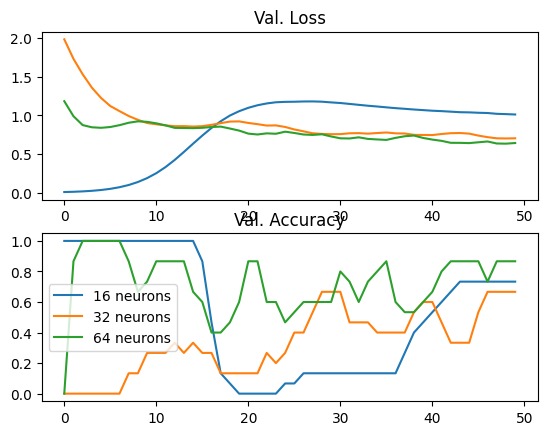

<Figure size 640x480 with 0 Axes>

In [13]:
plots = init_plot()

print("Model 1 (16n):")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
append_to_plot(plots, his, "16 neurons")

print("Model 2 (32n):")
his = compile_and_fit(Sequential([
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
]))
append_to_plot(plots, his, "32 neurons")

print("Model 3 (64n):")
his = compile_and_fit(Sequential([
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
]))
append_to_plot(plots, his, "64 neurons")

finalize_plot()

Исследуем влияние числа слоёв на результаты работы сети, модели:
- 1 слой с 16 нейронами
- 2 слоя с 16 нейронами 
- 3 слоя с 16 нейронами 
- 4 слоя с 16 нейронами 

1x 16n layer:
[Last epoch]
val_loss:  0.8442151546478271  val_accuracy:  0.800000011920929  loss:  0.8847143054008484  accuracy:  0.8888888955116272
2x 16n layers:
[Last epoch]
val_loss:  0.8069310784339905  val_accuracy:  0.06666667014360428  loss:  0.5596287846565247  accuracy:  0.7629629373550415
3x 16n layers:
[Last epoch]
val_loss:  0.8667200803756714  val_accuracy:  0.0  loss:  0.5202428698539734  accuracy:  0.7407407164573669
4x 16n layers:
[Last epoch]
val_loss:  0.2230691909790039  val_accuracy:  1.0  loss:  0.15928810834884644  accuracy:  0.970370352268219


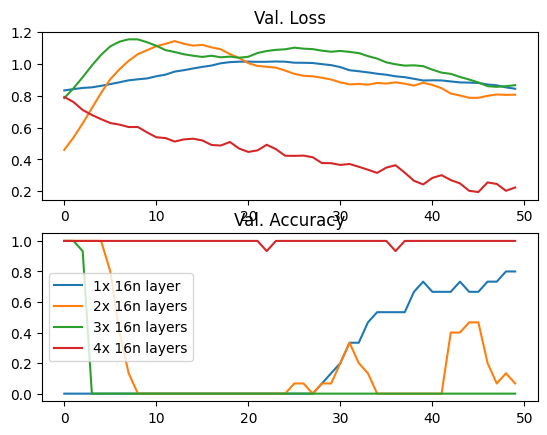

<Figure size 640x480 with 0 Axes>

In [14]:
plots = init_plot()

print("1x 16n layer:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
append_to_plot(plots, his, "1x 16n layer")

print("2x 16n layers:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
append_to_plot(plots, his, "2x 16n layers")

print("3x 16n layers:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
append_to_plot(plots, his, "3x 16n layers")

print("4x 16n layers:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
append_to_plot(plots, his, "4x 16n layers")

finalize_plot()

Влияние числа эпох на результаты сети (10, 50 и 100 эпох):

[Last epoch]
val_loss:  1.0398989915847778  val_accuracy:  0.13333334028720856  loss:  0.8955857157707214  accuracy:  0.7555555701255798
[Last epoch]
val_loss:  0.5710931420326233  val_accuracy:  1.0  loss:  0.6642657518386841  accuracy:  0.9037036895751953
[Last epoch]
val_loss:  0.2509452700614929  val_accuracy:  0.9333333373069763  loss:  0.13422231376171112  accuracy:  0.9629629850387573


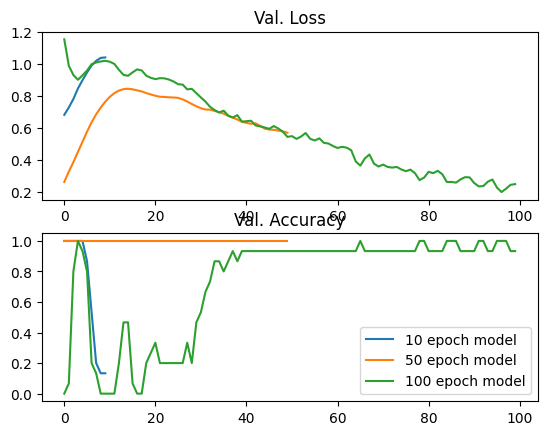

<Figure size 640x480 with 0 Axes>

In [15]:
plots = init_plot()

for en in [10, 50, 100]:
    his = compile_and_fit(
        Sequential([
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(3, activation='softmax')
        ]),
        epoch_num=en
    )
    append_to_plot(plots, his, str(en)+" epoch model")
finalize_plot()

Влияние размера пакета на результаты работы сетей:

[Last epoch]
val_loss:  0.3875181972980499  val_accuracy:  0.8666666746139526  loss:  0.14336037635803223  accuracy:  0.9555555582046509
[Last epoch]
val_loss:  0.31882280111312866  val_accuracy:  1.0  loss:  0.18625737726688385  accuracy:  0.9851852059364319
[Last epoch]
val_loss:  0.7653195858001709  val_accuracy:  0.20000000298023224  loss:  0.5153376460075378  accuracy:  0.8888888955116272


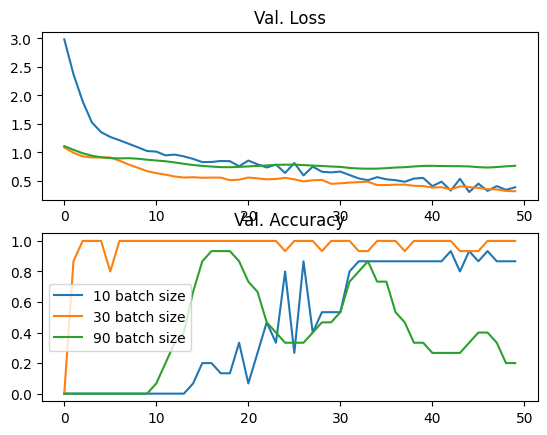

<Figure size 640x480 with 0 Axes>

In [17]:
plots = init_plot()

for bs in [10, 30, 90]:
    his = compile_and_fit(
        Sequential([
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(3, activation='softmax')
        ]),
        batch_sz=bs
    )
    append_to_plot(plots, his, str(bs)+" batch size")
finalize_plot()

Влияние величины validation_split (процента данных, которые остаются под валидацию, а не обучение) на результаты работы сети:

[Last epoch]
val_loss:  0.3599245548248291  val_accuracy:  1.0  loss:  0.3061152398586273  accuracy:  0.9729729890823364
[Last epoch]
val_loss:  0.45097893476486206  val_accuracy:  1.0  loss:  0.3404793441295624  accuracy:  0.9788732528686523
[Last epoch]
val_loss:  0.5932949781417847  val_accuracy:  0.9333333373069763  loss:  0.40778470039367676  accuracy:  0.9481481313705444
[Last epoch]
val_loss:  2.282015085220337  val_accuracy:  0.0  loss:  0.6519595384597778  accuracy:  0.8928571343421936
[Last epoch]
val_loss:  5.923151969909668  val_accuracy:  0.3333333432674408  loss:  0.18901555240154266  accuracy:  1.0


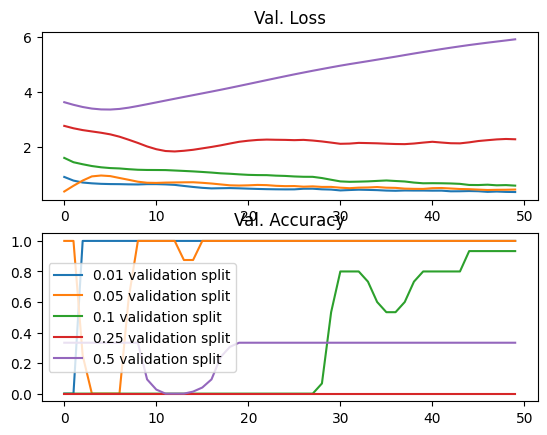

<Figure size 640x480 with 0 Axes>

In [18]:
plots = init_plot()

for vs in [0.01, 0.05, 0.1, 0.25, 0.5]:
    his = compile_and_fit(
        Sequential([
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(3, activation='softmax')
        ]),
        val_split=vs
    )
    append_to_plot(plots, his, str(vs)+" validation split")
finalize_plot()

[Last epoch]
val_loss:  0.05684540420770645  val_accuracy:  1.0  loss:  0.07031048834323883  accuracy:  0.9797297120094299


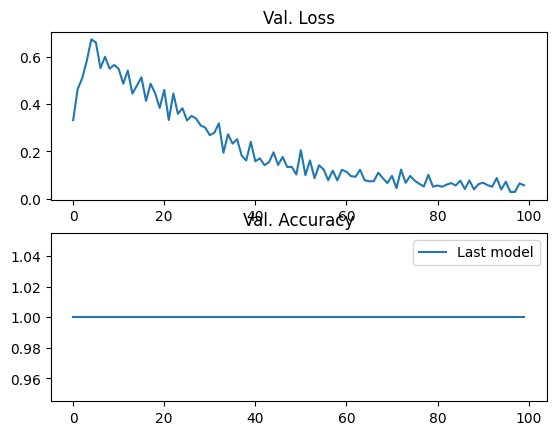

<Figure size 640x480 with 0 Axes>

In [19]:
plots = init_plot()

his = compile_and_fit(
        Sequential([
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(3, activation='softmax')
        ]),
        val_split=0.1,
        batch_sz=10,
        epoch_num=100
    )
append_to_plot(plots, his, "Last model")
finalize_plot()